#### Fraud Detection

#### Data Dectionary
##### Step = Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
##### type = CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
##### amount = amount of the transaction in local currency
##### nameOrig = customer who started the transaction
##### oldbalanceOrg = initial balance before the transaction
##### newbalanceOrig = customer's balance after the transaction.
##### nameDest = recipient ID of the transaction.
##### oldbalanceDest = initial recipient balance before the transaction.
##### newbalanceDest = recipient's balance after the transaction.
##### isFraud = identifies a fraudulent transaction (1) and non fraudulent (0)
##### isFlaggedFraud = Indicates whether a transaction was flagged as suspicious but not necessarily fraudulent.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
260504,14,CASH_OUT,178684.97,C8826189,21907.00,0.00,C1656139345,2842641.84,3116495.42,0.0,0.0
260505,14,CASH_OUT,118586.47,C185704945,35509.00,0.00,C726864847,39.00,0.00,0.0,0.0
260506,14,CASH_OUT,308503.35,C1324237571,123433.72,0.00,C500437472,97892.36,458476.08,0.0,0.0
260507,14,CASH_OUT,310920.52,C1355560664,0.00,0.00,C625901069,1499435.86,1876515.71,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260509 entries, 0 to 260508
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            260509 non-null  int64  
 1   type            260509 non-null  object 
 2   amount          260509 non-null  float64
 3   nameOrig        260509 non-null  object 
 4   oldbalanceOrg   260509 non-null  float64
 5   newbalanceOrig  260509 non-null  float64
 6   nameDest        260508 non-null  object 
 7   oldbalanceDest  260508 non-null  float64
 8   newbalanceDest  260508 non-null  float64
 9   isFraud         260508 non-null  float64
 10  isFlaggedFraud  260508 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.9+ MB


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,260341
1.0,167


In [ ]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,260508


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)

In [ ]:
df.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.max()

,0
step,14
type,TRANSFER
amount,10000000.0
oldbalanceOrg,38939424.03
newbalanceOrg,38946233.02
oldbalanceDest,41338441.34
newbalanceDest,41383645.15
isFraud,1.0
isFlaggedFraud,0.0


In [ ]:
df.min()

,0
step,1
type,CASH_IN
amount,0.3
oldbalanceOrg,0.0
newbalanceOrg,0.0
oldbalanceDest,0.0
newbalanceDest,0.0
isFraud,0.0
isFlaggedFraud,0.0


In [ ]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
260504,14,CASH_OUT,178684.97,21907.00,0.00,2842641.84,3116495.42,0.0,0.0
260505,14,CASH_OUT,118586.47,35509.00,0.00,39.00,0.00,0.0,0.0
260506,14,CASH_OUT,308503.35,123433.72,0.00,97892.36,458476.08,0.0,0.0
260507,14,CASH_OUT,310920.52,0.00,0.00,1499435.86,1876515.71,0.0,0.0


### EDA (Data Analysis)

<Axes: title={'center': 'Total amount per transaction type'}, xlabel='Type of Transaction', ylabel='Amount'>

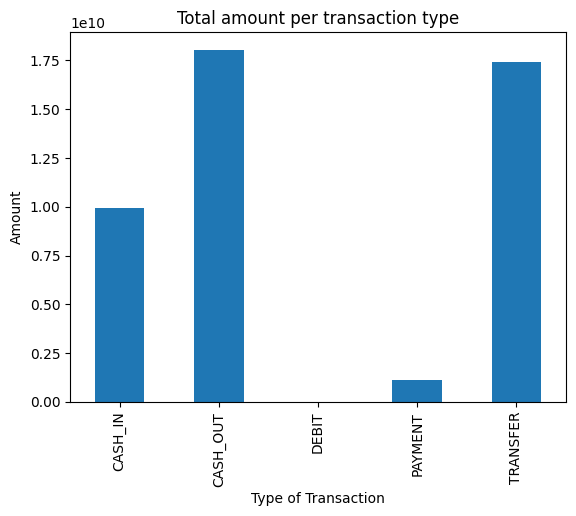

In [ ]:
df.groupby('type')['amount'].sum().plot(kind='bar', title="Total amount per transaction type", xlabel='Type of Transaction', ylabel='Amount')

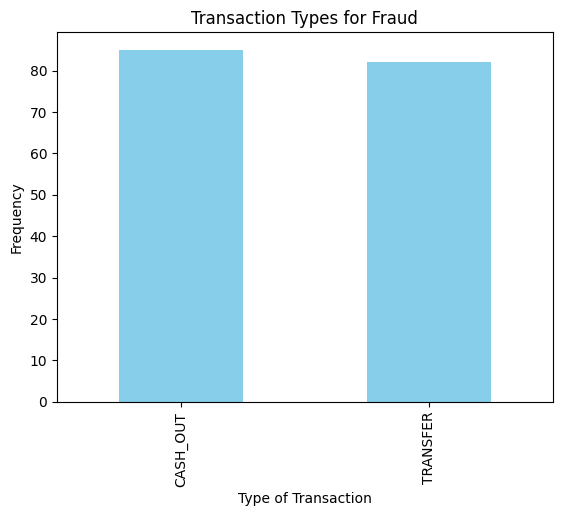

In [ ]:
#Fraud by Transaction Type
fraud_types = df.loc[df.isFraud == 1].type.value_counts()
fraud_types.plot(kind='bar',color='skyblue', title="Transaction Types for Fraud", xlabel='Type of Transaction', ylabel='Frequency')
plt.show()

##### TRANSFER and CASH_OUT are two most used mode of transaction and we can see that TRANSFER and CASH_OUT are also the only way in which fraud happen.

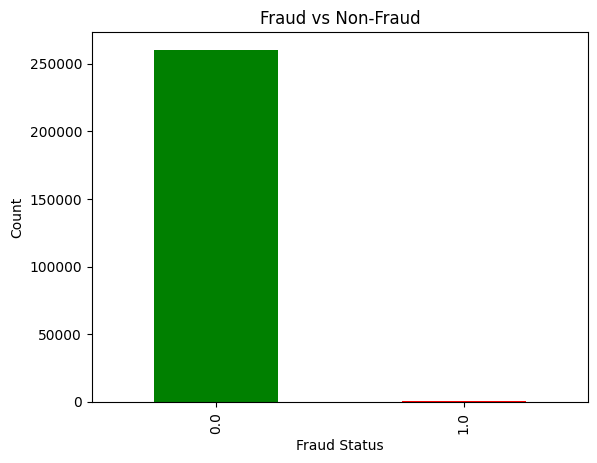

In [ ]:
# count of froud status
df['isFraud'].value_counts().plot(kind='bar',color=['green','red'],title='Fraud vs Non-Fraud')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()

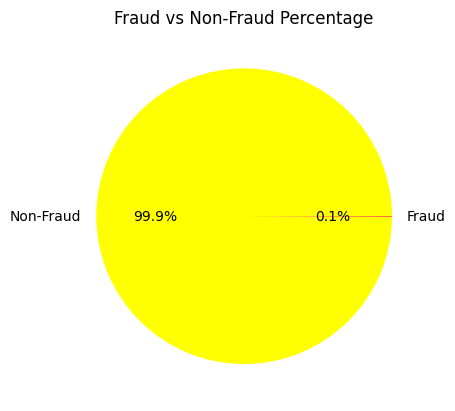

In [ ]:
# Calculate the percentage of fraud and non-fraud transactions
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
fraud_percentage.plot(kind='pie', labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['yellow', 'red'], title='Fraud vs Non-Fraud Percentage')
plt.ylabel('')
plt.show()


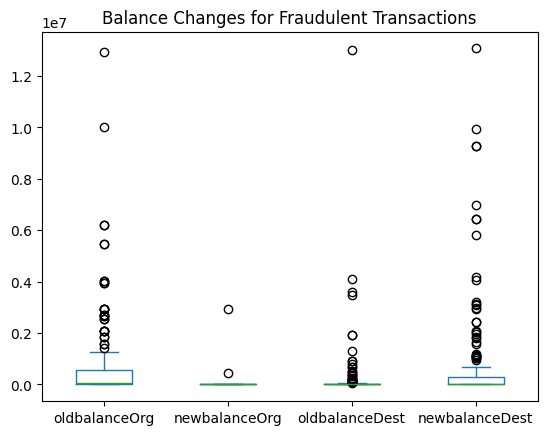

In [ ]:
# changes in balances
fraud_balance_change = df[df['isFraud'] == 1][['oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']]
fraud_balance_change.plot(kind='box', title="Balance Changes for Fraudulent Transactions")
plt.show()

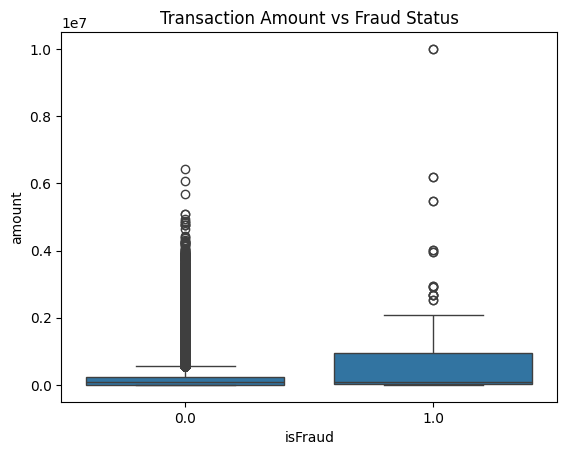

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs Fraud Status')
plt.show()


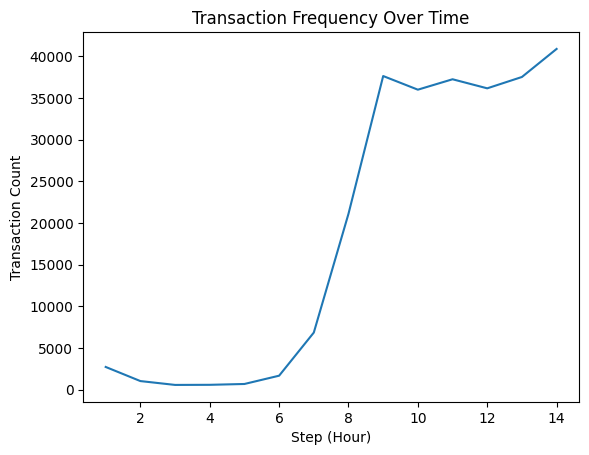

In [ ]:
# frequency of transaction
df['step'].value_counts().sort_index().plot(kind='line', title="Transaction Frequency Over Time")
plt.xlabel('Step (Hour)')
plt.ylabel('Transaction Count')
plt.show()

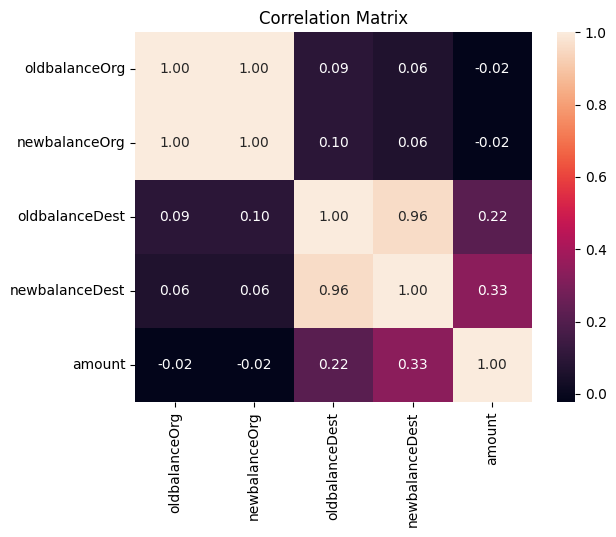

In [ ]:
# correlation between balance and amount
correlation = df[['oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest', 'amount']].corr()
sns.heatmap(correlation, annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Feature Engineering

In [ ]:
df['balance_diff_org'] = df['oldbalanceOrg'] - df['newbalanceOrg']
df['balance_diff_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [ ]:
# Drop the original features after creating derived ones
df = df.drop(['oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest'], axis=1)

In [ ]:
df

,step,type,amount,isFraud,isFlaggedFraud,balance_diff_org,balance_diff_dest
0,1,PAYMENT,9839.64,0.0,0.0,9839.64,0.00
1,1,PAYMENT,1864.28,0.0,0.0,1864.28,0.00
2,1,TRANSFER,181.00,1.0,0.0,181.00,0.00
3,1,CASH_OUT,181.00,1.0,0.0,181.00,21182.00
4,1,PAYMENT,11668.14,0.0,0.0,11668.14,0.00
...,...,...,...,...,...,...,...
260504,14,CASH_OUT,178684.97,0.0,0.0,21907.00,-273853.58
260505,14,CASH_OUT,118586.47,0.0,0.0,35509.00,39.00
260506,14,CASH_OUT,308503.35,0.0,0.0,123433.72,-360583.72
260507,14,CASH_OUT,310920.52,0.0,0.0,0.00,-377079.85


In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:
df

,step,amount,isFraud,isFlaggedFraud,balance_diff_org,balance_diff_dest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0.0,0.0,9839.64,0.00,False,False,True,False
1,1,1864.28,0.0,0.0,1864.28,0.00,False,False,True,False
2,1,181.00,1.0,0.0,181.00,0.00,False,False,False,True
3,1,181.00,1.0,0.0,181.00,21182.00,True,False,False,False
4,1,11668.14,0.0,0.0,11668.14,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
260504,14,178684.97,0.0,0.0,21907.00,-273853.58,True,False,False,False
260505,14,118586.47,0.0,0.0,35509.00,39.00,True,False,False,False
260506,14,308503.35,0.0,0.0,123433.72,-360583.72,True,False,False,False
260507,14,310920.52,0.0,0.0,0.00,-377079.85,True,False,False,False


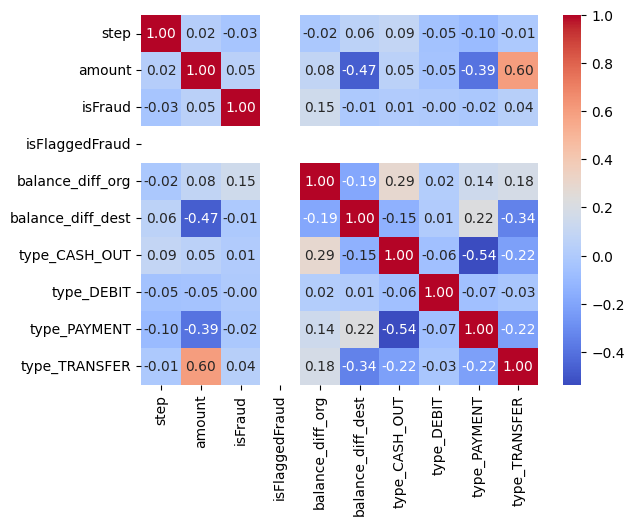

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f'); plt.show()

### Model Building

In [ ]:
F= df[df['isFraud']==1]
N= df[df['isFraud']==0]

In [ ]:
# Determine the number of F,N
outlier_fraction = len(F)/float(len(N))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(F)))

print("Valid Cases : {}".format(len(N)))

0.0006414663844726724
Fraud Cases : 167
Valid Cases : 260341


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
RANDOM_SPEED = 42
LABELS = ["0", "1"]

In [ ]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["isFraud","isFlaggedFraud"]]
# Store the variable we are predicting
target = "isFraud"
# Define a random state
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(260509, 8)
(260509,)


In [ ]:
Y = Y.dropna()
X = X.dropna()

In [ ]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1)
}

In [ ]:
type(classifiers)

dict

In [ ]:
n_outliers = len(F)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 261
Accuracy Score :
0.9989981113823759
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    260341
         1.0       0.22      0.22      0.22       167

    accuracy                           1.00    260508
   macro avg       0.61      0.61      0.61    260508
weighted avg       1.00      1.00      1.00    260508

Local Outlier Factor: 331
Accuracy Score :
0.99872940562286
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    260341
         1.0       0.01      0.01      0.01       167

    accuracy                           1.00    260508
   macro avg       0.51      0.51      0.51    260508
weighted avg       1.00      1.00      1.00    260508

